In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("student_placement_prediction_dataset_2026.csv")
df=pd.DataFrame(data)
print(df)

       student_id  age  gender  cgpa      branch college_tier  \
0               1   24    Male  7.53          IT       Tier 2   
1               2   21    Male  7.92         CSE       Tier 2   
2               3   22  Female  8.60         EEE       Tier 1   
3               4   24    Male  6.68         CSE       Tier 1   
4               5   20  Female  8.43          IT       Tier 3   
...           ...  ...     ...   ...         ...          ...   
99995       99996   21    Male  7.97  Mechanical       Tier 2   
99996       99997   18  Female  7.79         CSE       Tier 1   
99997       99998   20  Female  6.71          IT       Tier 2   
99998       99999   19  Female  7.21         CSE       Tier 2   
99999      100000   22  Female  8.58         ECE       Tier 3   

       internships_count  projects_count  certifications_count  \
0                      4               6                     1   
1                      1               3                     6   
2                    

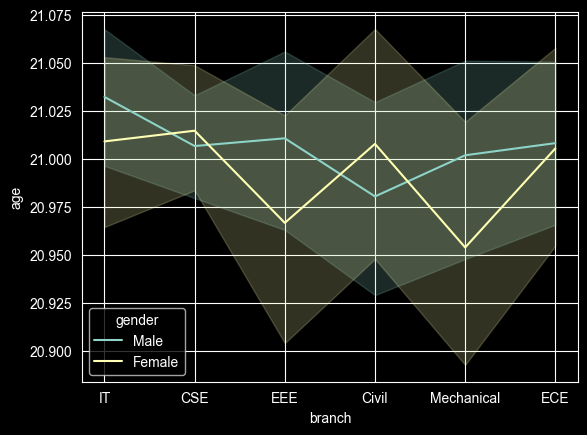

In [19]:
sns.lineplot(data=df,y="age",x="branch",hue="gender")
plt.show()

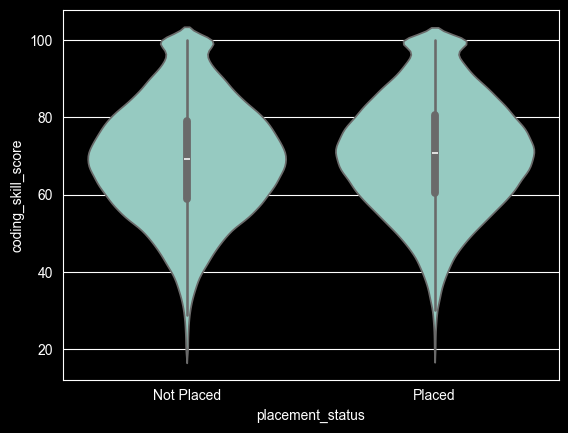

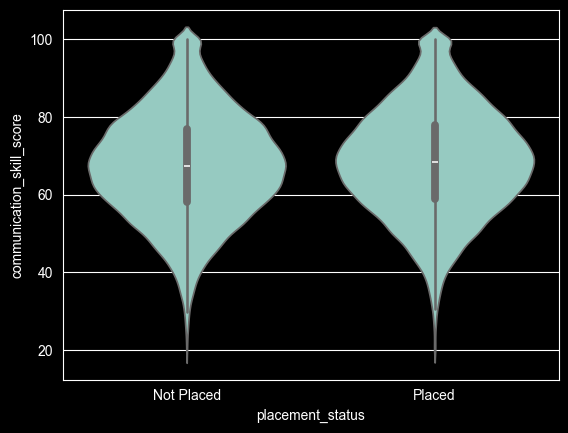

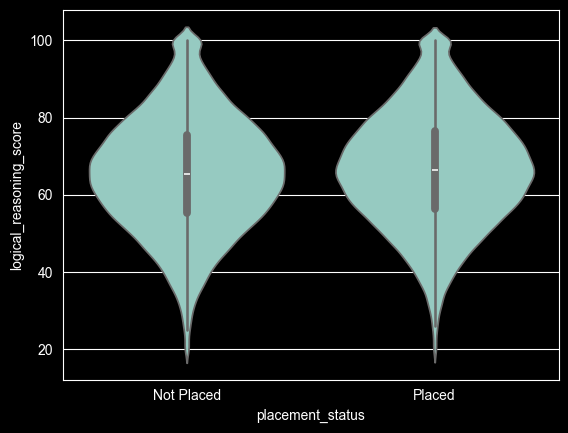

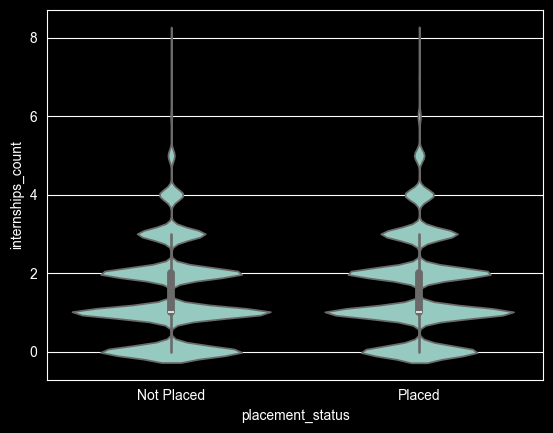

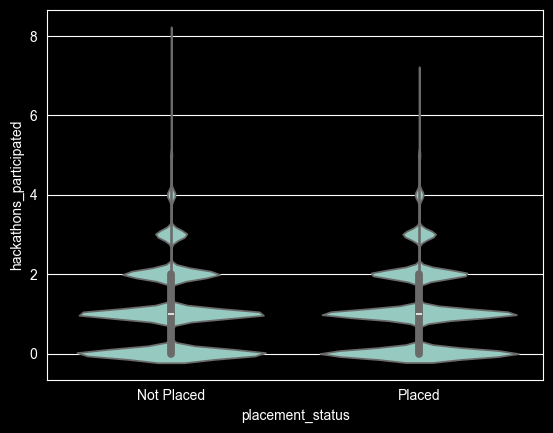

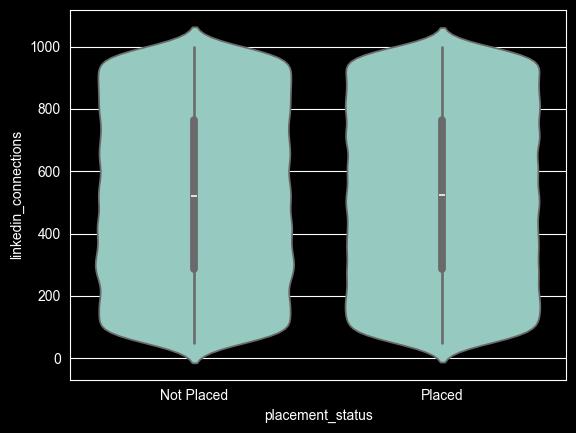

In [50]:
sns.violinplot(x="placement_status",y="coding_skill_score",data=df)
plt.show()
sns.violinplot(data=df,x="placement_status",y="communication_skill_score")
plt.show()
sns.violinplot(data=df,x="placement_status",y="logical_reasoning_score")
plt.show()
sns.violinplot(data=df,x="placement_status",y="internships_count")
plt.show()
sns.violinplot(data=df,x="placement_status",y="hackathons_participated")
plt.show()
sns.violinplot(data=df,x="placement_status",y="linkedin_connections")
plt.show()



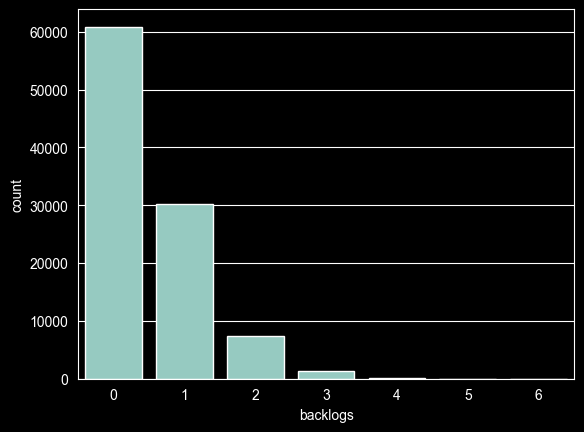

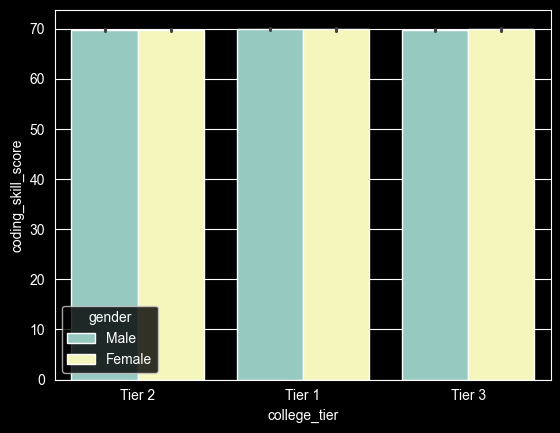

In [27]:
sns.countplot(data,x="backlogs")
plt.show()
sns.barplot(data,x="college_tier",y="coding_skill_score",hue="gender")
plt.show()


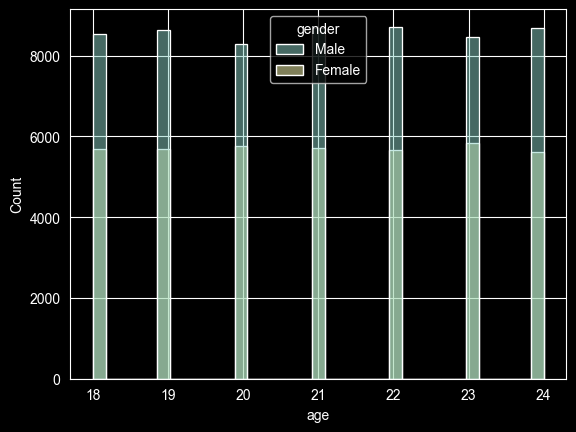

In [36]:
sns.histplot(data=df,x="age",hue="gender")
plt.show()

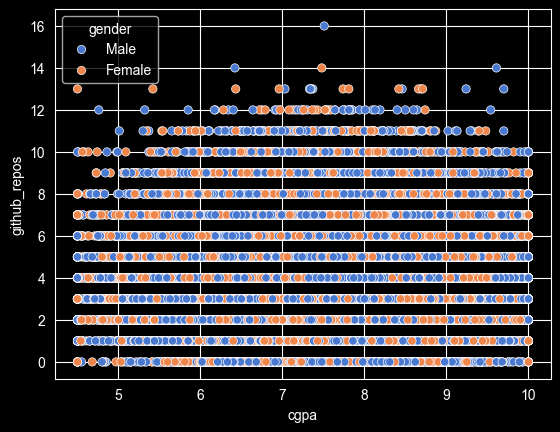

In [54]:

sns.scatterplot(data=df,x="cgpa",y="github_repos",hue="gender",palette="muted")
plt.show()


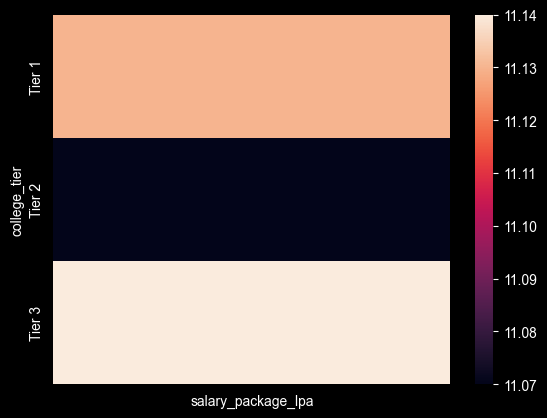

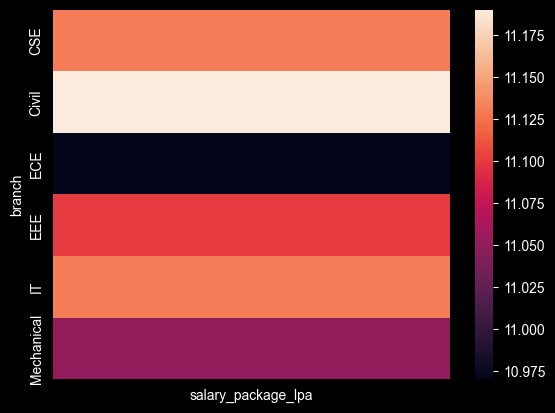

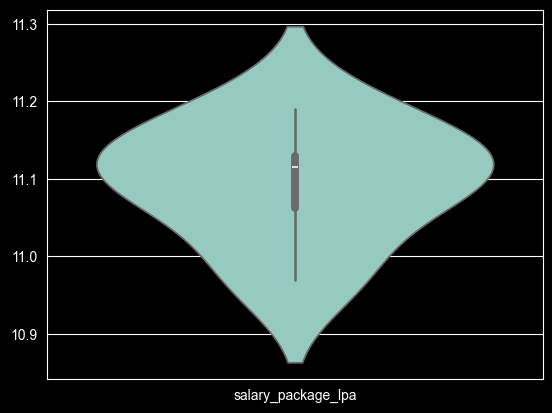

In [63]:
group=data.groupby("college_tier").agg({"salary_package_lpa":"median"})
sns.heatmap(data=group)
plt.show()
group=data.groupby("branch").agg({"salary_package_lpa":"median"})
sns.heatmap(data=group)
plt.show()
sns.violinplot(data=group)
plt.show()

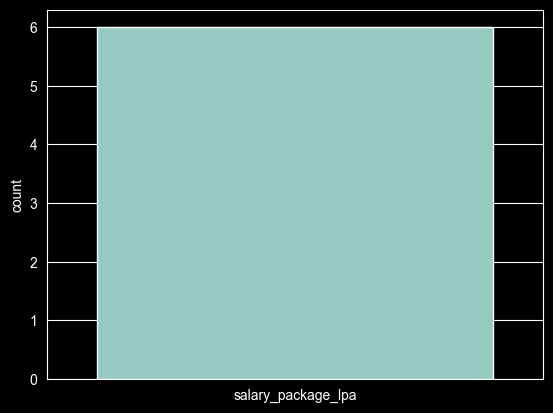

In [64]:
sns.countplot(data=group)
plt.show()

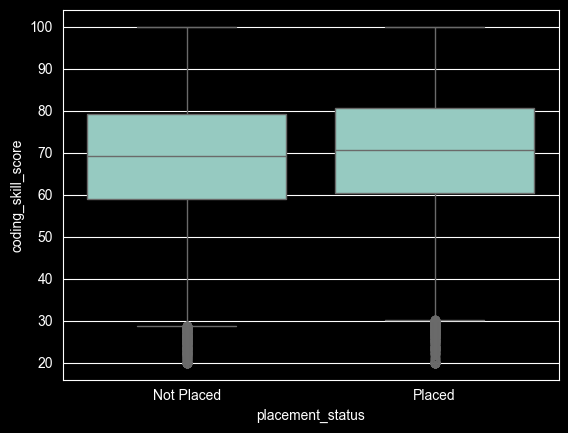

In [66]:
df=data.groupby("placement_status")["coding_skill_score"].mean()

sns.boxplot(x="placement_status", y="coding_skill_score", data=data)
plt.show()


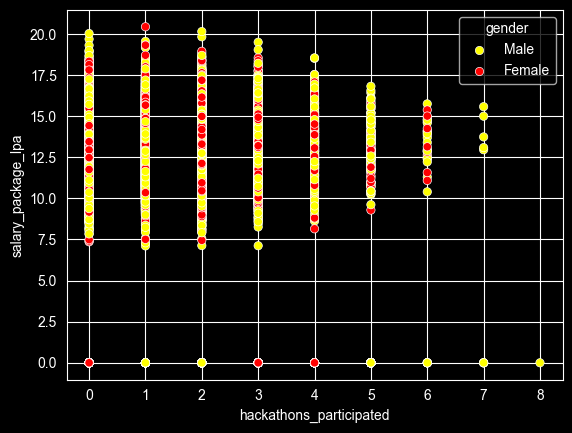

In [70]:
sns.scatterplot(x="hackathons_participated", y="salary_package_lpa", data=data,hue="gender",palette=["Yellow","red"])
plt.show()

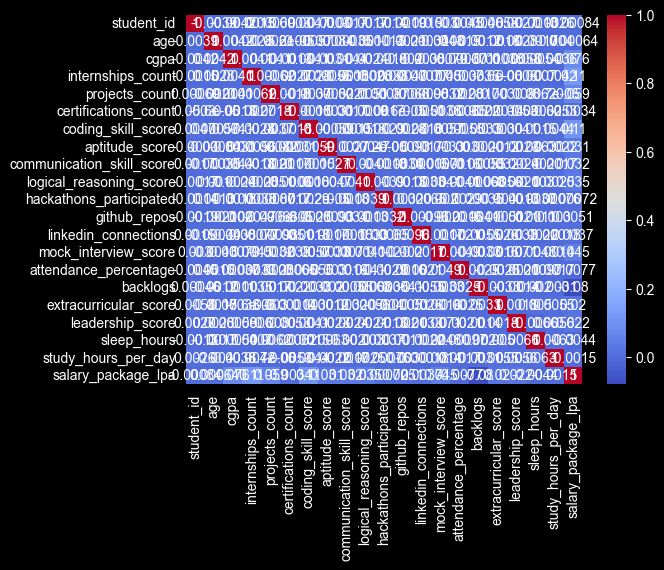

In [74]:
df=data
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['placement_status'] = df['placement_status'].map({'Placed': 1, 'Not Placed': 0})
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()





In [76]:
print(data.info())

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   student_id                 100000 non-null  int64  
 1   age                        100000 non-null  int64  
 2   gender                     100000 non-null  int64  
 3   cgpa                       100000 non-null  float64
 4   branch                     100000 non-null  str    
 5   college_tier               100000 non-null  str    
 6   internships_count          100000 non-null  int64  
 7   projects_count             100000 non-null  int64  
 8   certifications_count       100000 non-null  int64  
 9   coding_skill_score         100000 non-null  float64
 10  aptitude_score             100000 non-null  float64
 11  communication_skill_score  100000 non-null  float64
 12  logical_reasoning_score    100000 non-null  float64
 13  hackathons_participated    100000 non-nul

Text(0.5, 1.0, 'Placement Status Distribution')

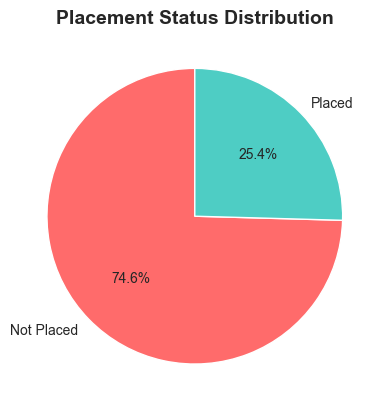

In [88]:
placement_counts = df['placement_status'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']
labels = ['Not Placed', 'Placed']
plt.pie(placement_counts.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Placement Status Distribution', fontsize=14, fontweight='bold')

Text(0, 0.5, 'Count')

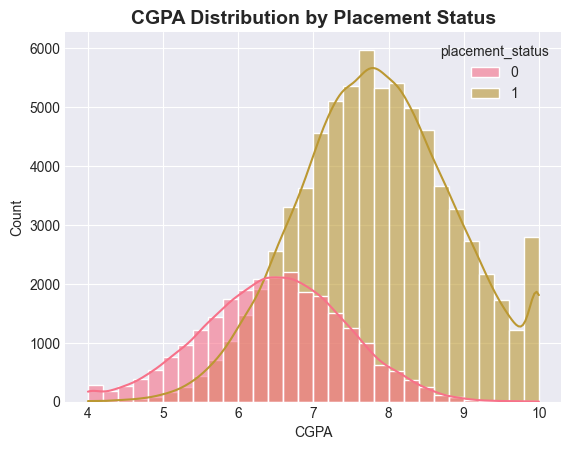

In [89]:
sns.histplot(data=df, x='cgpa', hue='placement_status', bins=30, kde=True, alpha=0.6)
plt.title('CGPA Distribution by Placement Status', fontsize=14, fontweight='bold')
plt.xlabel('CGPA')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

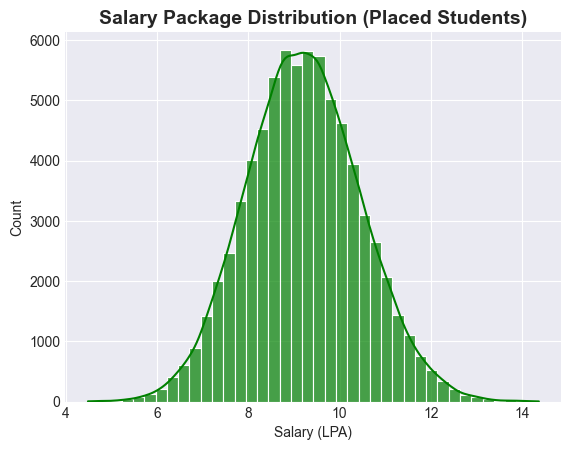

In [90]:
placed_df = df[df['placement_status'] == 1]
sns.histplot(placed_df['salary_package_lpa'], bins=40, kde=True, color='green', alpha=0.7)
plt.title('Salary Package Distribution (Placed Students)', fontsize=14, fontweight='bold')
plt.xlabel('Salary (LPA)')
plt.ylabel('Count')

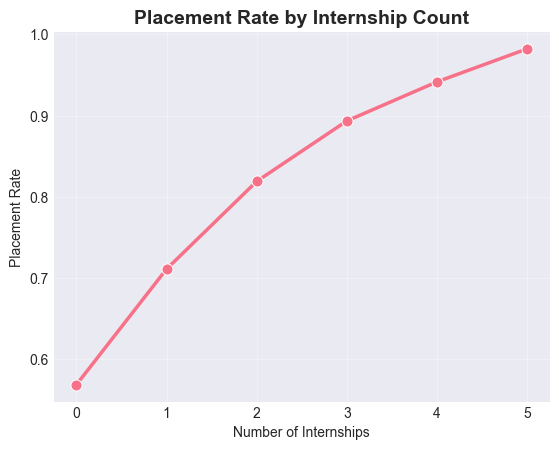

In [91]:
internship_placement = df.groupby('internships_count')['placement_status'].mean()
sns.lineplot(x=internship_placement.index, y=internship_placement.values, marker='o', linewidth=2.5, markersize=8)
plt.title('Placement Rate by Internship Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Internships')
plt.ylabel('Placement Rate')
plt.grid(True, alpha=0.3)

Text(0.5, 0, 'Correlation Coefficient')

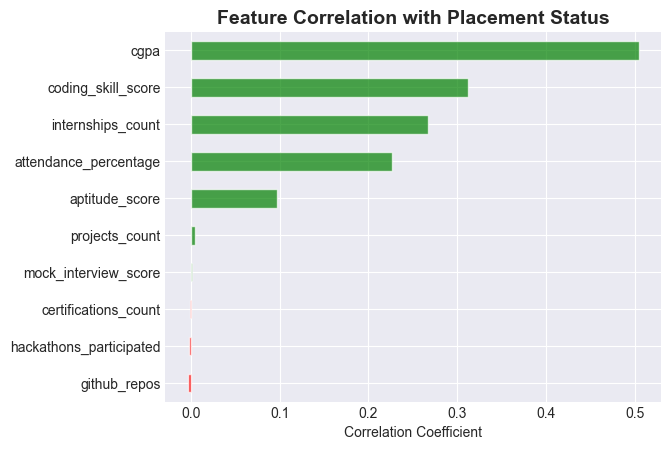

In [92]:
numeric_features = ['cgpa', 'coding_skill_score', 'aptitude_score', 'internships_count',
                   'projects_count', 'certifications_count', 'attendance_percentage',
                   'hackathons_participated', 'github_repos', 'mock_interview_score']
correlations = df[numeric_features + ['placement_status']].corr()['placement_status'].drop('placement_status').sort_values(ascending=True)
colors = ['red' if x < 0 else 'green' for x in correlations.values]
correlations.plot(kind='barh', color=colors, alpha=0.7)
plt.title('Feature Correlation with Placement Status', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')

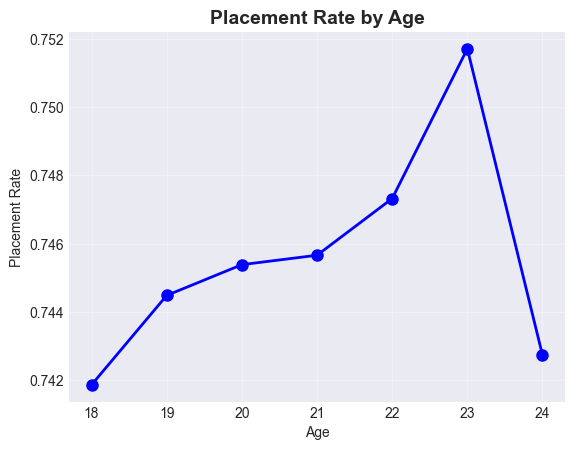

In [93]:
age_placement = df.groupby('age').agg({
    'placement_status': 'mean',
    'salary_package_lpa': 'mean'
}).reset_index()
plt.plot(age_placement['age'], age_placement['placement_status'], marker='o', linewidth=2, markersize=8, color='blue')
plt.xlabel('Age')
plt.ylabel('Placement Rate')
plt.title('Placement Rate by Age', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)